<a href="https://colab.research.google.com/github/Kadakol/Keras/blob/master/3_5_Classifying_Newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def one_hot_encode(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results  

y_train = one_hot_encode(train_labels)
y_test = one_hot_encode(test_labels)  

In [0]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [0]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=[x_val, y_val])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 152us/step - loss: 2.6039 - acc: 0.5608 - val_loss: 1.7290 - val_acc: 0.6430
Epoch 2/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.3934 - acc: 0.7132 - val_loss: 1.3038 - val_acc: 0.7260
Epoch 3/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.0399 - acc: 0.7749 - val_loss: 1.1488 - val_acc: 0.7400
Epoch 4/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.8255 - acc: 0.8220 - val_loss: 1.0543 - val_acc: 0.7740
Epoch 5/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.6543 - acc: 0.8607 - val_loss: 1.0153 - val_acc: 0.7600
Epoch 6/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.5262 - acc: 0.8901 - val_loss: 0.9328 - val_acc: 0.7990
Epoch 7/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.4270 - acc: 0.9095 - val_loss: 0.9144 - val_acc: 0.8030


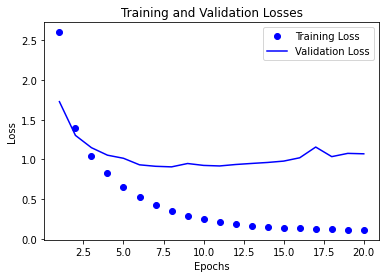

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

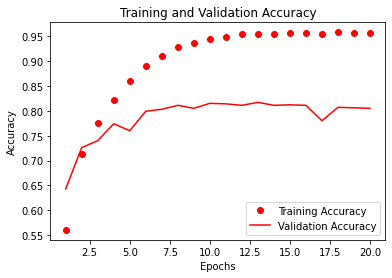

In [20]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=[x_val, y_val])

results = model.evaluate(x_test, y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 131us/step - loss: 2.7365 - acc: 0.4907 - val_loss: 1.8245 - val_acc: 0.6440
Epoch 2/9
7982/7982 [==============================] - 1s 115us/step - loss: 1.4725 - acc: 0.7015 - val_loss: 1.3394 - val_acc: 0.7250
Epoch 3/9
7982/7982 [==============================] - 1s 114us/step - loss: 1.0755 - acc: 0.7769 - val_loss: 1.1510 - val_acc: 0.7590
Epoch 4/9
7982/7982 [==============================] - 1s 114us/step - loss: 0.8490 - acc: 0.8222 - val_loss: 1.0625 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 1s 116us/step - loss: 0.6813 - acc: 0.8572 - val_loss: 1.0062 - val_acc: 0.7860
Epoch 6/9
7982/7982 [==============================] - 1s 114us/step - loss: 0.5490 - acc: 0.8854 - val_loss: 0.9530 - val_acc: 0.7920
Epoch 7/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.4398 - acc: 0.9105 - val_loss: 0.9067 - val_acc: 0.8110
Epoch 8

In [22]:
results

[0.9775136215603999, 0.7902938723564148]

In [23]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19456812110418523

In [24]:
predictions = model.predict(x_test)

predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

1.0

In [26]:
np.argmax(predictions[0])

3

In [0]:
# Casting the labels as integer tensors instead of one-hot encoding

y_train = np.array(train_labels)
y_test = np.array(test_labels)

# Use sparse_cateogrical_crossentropy in this case
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [31]:
# Using hidden layers with number of hidden units lesser than that of the output layer

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=[x_val, y_val])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 162us/step - loss: 3.5437 - acc: 0.0833 - val_loss: 3.2039 - val_acc: 0.3360
Epoch 2/20
7982/7982 [==============================] - 1s 117us/step - loss: 2.9378 - acc: 0.3727 - val_loss: 2.7030 - val_acc: 0.3870
Epoch 3/20
7982/7982 [==============================] - 1s 115us/step - loss: 2.4270 - acc: 0.4747 - val_loss: 2.2887 - val_acc: 0.5210
Epoch 4/20
7982/7982 [==============================] - 1s 116us/step - loss: 2.0414 - acc: 0.5710 - val_loss: 2.0118 - val_acc: 0.5640
Epoch 5/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.7730 - acc: 0.6067 - val_loss: 1.8414 - val_acc: 0.5690
Epoch 6/20
7982/7982 [==============================] - 1s 114us/step - loss: 1.5926 - acc: 0.6155 - val_loss: 1.7239 - val_acc: 0.5770
Epoch 7/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.4681 - acc: 0.6189 - val_loss: 1.6516 - val_acc: 0.5870


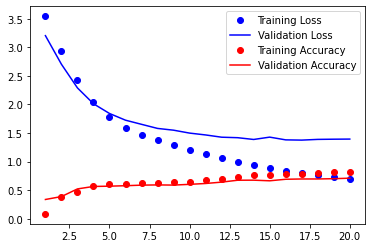

In [33]:
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.plot(epochs, acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')

plt.legend()

plt.show()